# Assignment on Classification
Do the following in the iris dataset
1. Read the dataset to python environment

In [1]:
# importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read dataset 


In [4]:
data= pd.read_excel('iris.xls')

In [5]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.shape


(150, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.describe()


,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#checking missing data

In [10]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# 2. Do the necessary pre-processing steps

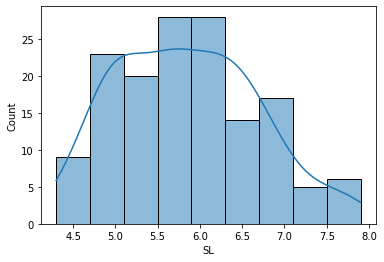

In [11]:
sns.histplot(data['SL'],kde=True)
plt.show()

In [12]:
data['SL']=data['SL'].fillna(data['SL'].median())

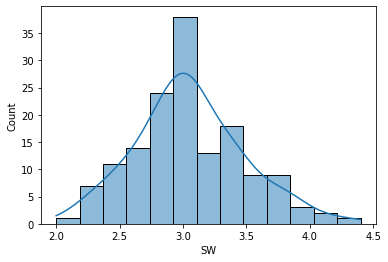

In [13]:
sns.histplot(data['SW'],kde=True)
plt.show()

In [14]:
data['SW']=data['SW'].fillna(data['SW'].mean())

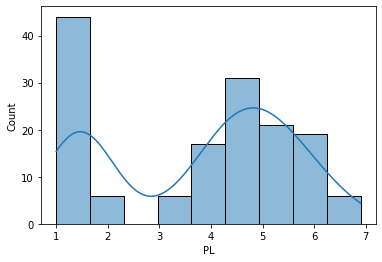

In [15]:
sns.histplot(data['PL'],kde=True)
plt.show()

In [16]:
data['PL']=data['PL'].interpolate()

In [17]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

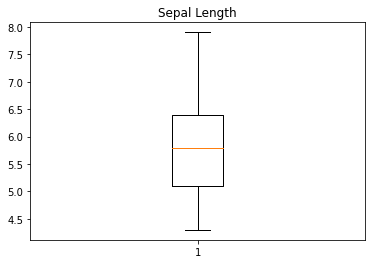

In [18]:
#SL DATA
plt.boxplot(data['SL'])
plt.title('Sepal Length')
plt.show()

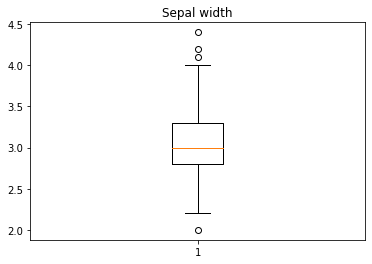

In [19]:
#SW DATA
plt.boxplot(data['SW'])
plt.title('Sepal width')
plt.show()

In [20]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.3


In [21]:
IQR = Q3-Q1
IQR

0.5

In [22]:
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR

In [23]:
print(lower_lim)
print(upper_lim)

2.05
4.05


In [24]:
outliers=[]
for n in data['SW']:
    if (n>upper_lim) or (n<lower_lim):
        outliers.append(n)

In [25]:
outliers

[4.4, 4.1, 4.2, 2.0]

In [26]:
index=data['SW']>upper_lim
data.loc[index].index

Int64Index([15, 32, 33], dtype='int64')

In [27]:
index=data['SW']<lower_lim
data.loc[index].index

Int64Index([60], dtype='int64')

In [28]:
data=data.drop([14, 15, 32, 33,60])

In [29]:
data.head()


,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


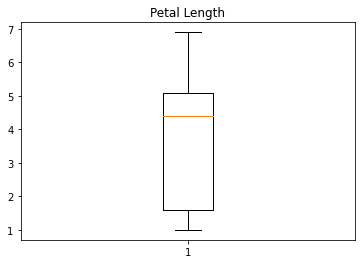

In [30]:
#PL DATA
plt.boxplot(data['PL'])
plt.title('Petal Length')
plt.show()

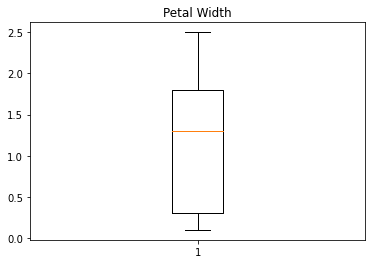

In [31]:
#PW DATA
plt.boxplot(data['PW'])
plt.title('Petal Width')
plt.show()

In [32]:
data['Classification'].nunique()

3

In [33]:
from sklearn import preprocessing


In [34]:

label_encoder=preprocessing.LabelEncoder()

In [35]:
data['Classification']=label_encoder.fit_transform(data['Classification'])


In [36]:
data.head

<bound method NDFrame.head of       SL   SW   PL   PW  Classification
0    5.1  3.5  1.4  0.2               0
1    4.9  3.0  1.4  0.2               0
2    4.7  3.2  1.3  0.2               0
3    4.6  3.1  1.5  0.2               0
4    5.0  3.6  1.4  0.2               0
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3               2
146  6.3  2.5  5.0  1.9               2
147  6.5  3.0  5.2  2.0               2
148  6.2  3.4  5.4  2.3               2
149  5.9  3.0  5.1  1.8               2

[145 rows x 5 columns]>

In [37]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 3. Find out which classification model gives the best result (also do random forest algorithm)

In [38]:
x=data.drop('Classification',axis=1)
y=data['Classification']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr=LogisticRegression()
model_lr=lr.fit(x_train,y_train)
y_pred_lr=model_lr.predict(x_test)

C:\Users\dell\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
confusion_matrix(y_test,y_pred_lr)


array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

In [46]:
accuracy_score(y_test,y_pred_lr)

0.9310344827586207

# KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier


In [48]:
classifier= KNeighborsClassifier(n_neighbors=8)
classifier= classifier.fit(x_train,y_train)
y_pred_kNN = classifier.predict(x_test)

In [49]:
confusion_matrix(y_test,y_pred_kNN)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]], dtype=int64)

In [50]:
accuracy_score(y_test,y_pred_kNN)



0.896551724137931

# SVM

In [51]:
from sklearn.svm import SVC

In [52]:
clf_svm =SVC(kernel='linear')
clf_svm =clf_svm.fit(x_train,y_train)
y_pred_svm=clf_svm.predict(x_test)

In [53]:
confusion_matrix(y_test,y_pred_svm)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

In [54]:
accuracy_score(y_test,y_pred_svm)

0.9655172413793104

In [55]:
# using rbf as kernel
clf_svm2 =SVC(kernel='rbf')
clf_svm2 =clf_svm2.fit(x_train,y_train)
y_pred_svm2 =clf_svm2.predict(x_test)

In [56]:
confusion_matrix(y_test,y_pred_svm2)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]], dtype=int64)

In [57]:
accuracy_score(y_test,y_pred_svm2)


0.896551724137931

# Decision tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(x_train,y_train)
y_pred_dt = dt_clf.predict(x_test)

In [60]:
confusion_matrix(y_test,y_pred_dt)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 3, 8]], dtype=int64)

In [61]:
accuracy_score(y_test,y_pred_dt)

0.8620689655172413

# Random Forest Algorithm

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf_clf= RandomForestClassifier()
rf_clf=rf_clf.fit(x_train,y_train)
y_pred_rf = rf_clf.predict(x_test)


In [64]:
confusion_matrix(y_test,y_pred_rf)

array([[9, 0, 0],
       [0, 8, 1],
       [0, 2, 9]], dtype=int64)

In [65]:
accuracy_score(y_test,y_pred_rf)


0.896551724137931